3. Usando el algoritmo de Metrópolis, realice el muestreo de N = 1000 eventos de una distribución normal: $$A - N(x; \mu = 2; \lambda = 0:5)$$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|██████████| 9999/9999 [00:00<00:00, 14605.01it/s]


(array([0.00434679, 0.00434679, 0.00579572, 0.01014252, 0.0188361 ,
        0.02028503, 0.03187648, 0.02318289, 0.05795723, 0.05071258,
        0.06665082, 0.09562943, 0.11011874, 0.15938238, 0.25211395,
        0.26225647, 0.32166263, 0.44771961, 0.45786212, 0.44047495,
        0.53030866, 0.57522551, 0.7346079 , 0.74330148, 0.75634186,
        0.79980978, 0.75923972, 0.78821834, 0.74185255, 0.69258891,
        0.65201884, 0.61869344, 0.58681696, 0.51581935, 0.41729206,
        0.35933483, 0.2637054 , 0.26660326, 0.20574817, 0.12026125,
        0.11446553, 0.08838478, 0.06375295, 0.0376722 , 0.02752968,
        0.01159145, 0.01593824, 0.00434679, 0.00724465, 0.00434679]),
 array([0.18704963, 0.25676318, 0.32647673, 0.39619027, 0.46590382,
        0.53561736, 0.60533091, 0.67504445, 0.744758  , 0.81447155,
        0.88418509, 0.95389864, 1.02361218, 1.09332573, 1.16303927,
        1.23275282, 1.30246636, 1.37217991, 1.44189346, 1.511607  ,
        1.58132055, 1.65103409, 1.72074764, 1.

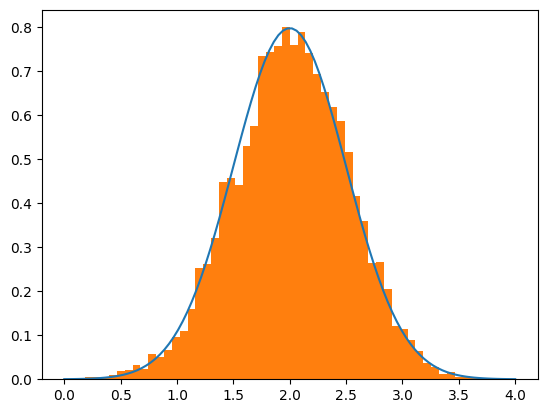

In [4]:
def Metropolis(x0, Normal, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Normal(x[i-1],mu,sigma)
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Normal(xf,mu,sigma)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[100:,:]
def normal(x,mu,sigma):
  c=1/np.sqrt(2*np.pi*sigma**2)
  return np.exp(-0.5*((x-mu)/sigma)**2)*c

mu=2
sigma=0.5
x_=np.linspace(0,4,100)

plt.plot(x_,normal(x_,2,0.5))
x0=np.array([1.])
MCMC = Metropolis(x0,normal)

plt.hist(MCMC,density=True,bins=50)